In [15]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data_poke = pd.read_csv('data/Pokemon.csv')

In [9]:
tip_subtip = data_poke[['Type 1','Type 2','#']].groupby(['Type 1','Type 2']).count()

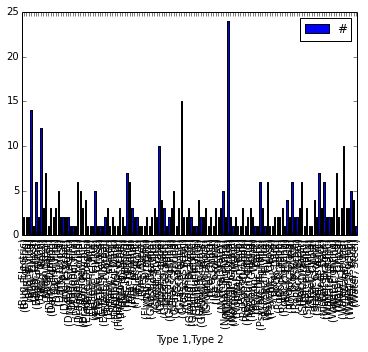

In [17]:
tip_subtip.plot(kind='bar')

In [18]:
plt.show()